In [1]:
import pyvo
import matplotlib.pyplot as plt

In [2]:
service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")

1)Plot the planetary mass versus semi-major axis. Identify the
planets known as “hot Jupiters”. Identify the planets known as “super-
Earths” or “mini-Neptunes” (hint: Neptune is 0.05 Jupiter masses, Earth is
0.003 Jupiter masses). Explain how these planets are different from the
planets in the Solar System.

In [73]:
query1 = "SELECT mass, semi_major_axis FROM exoplanet.epn_core WHERE mass is not NULL and semi_major_axis is not NULL"
tabela1 = service.search(query1)
tabela1 = tabela1.to_table()

In [7]:
tabela1 

mass,semi_major_axis
jupiterMass,AU
float64,float64
21.0,243.0
9.653,2.845
6.9,27.4
14.0,330.0
32.0,120.0
13.0,84.0
...,...
12.6,3.308


Text(0.5, 0, 'semi-major axis [AU]')

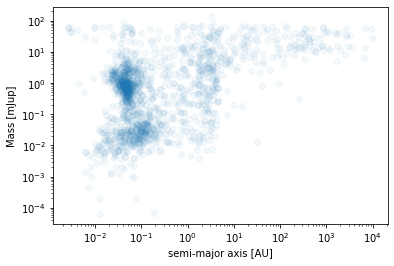

In [80]:
plt.scatter(tabela1['semi_major_axis'], tabela1['mass'], alpha = 0.05)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Mass [mJup]')
plt.xlabel('semi-major axis [AU]')

Darker areas in out plot indicate clusters, one of which is a cluster of "Hot Jupiters" which will be shown further in the coming analysis

In [17]:
query_earths = "SELECT mass, semi_major_axis FROM exoplanet.epn_core WHERE mass < 0.006 and mass is not NULL and semi_major_axis is not NULL"
tabela_earths = service.search(query_earths)
tabela_earths = tabela_earths.to_table()

query_neptunes = "SELECT mass, semi_major_axis FROM exoplanet.epn_core WHERE mass >= 0.006 and mass <= 0.1 and mass is not NULL and semi_major_axis is not NULL"
tabela_neptunes = service.search(query_neptunes)
tabela_neptunes = tabela_neptunes.to_table()

query_jupiters = "SELECT mass, semi_major_axis FROM exoplanet.epn_core WHERE mass > 0.1 and mass is not NULL and semi_major_axis is not NULL"
tabela_jupiters = service.search(query_jupiters)
tabela_jupiters = tabela_jupiters.to_table()

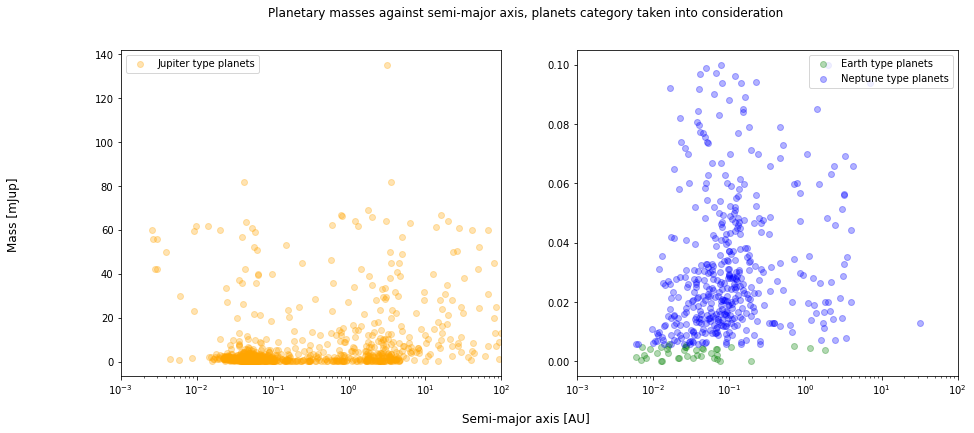

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
fig.suptitle('Planetary masses against semi-major axis, planets category taken into consideration')
ax1.scatter(tabela_jupiters['semi_major_axis'], tabela_jupiters['mass'], c = 'orange', alpha = 0.3)
ax2.scatter(tabela_earths['semi_major_axis'], tabela_earths['mass'], c = 'green', alpha = 0.3)
ax2.scatter(tabela_neptunes['semi_major_axis'], tabela_neptunes['mass'], c = 'blue', alpha = 0.3)
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlim(left = 0.001)
ax2.set_xlim(left = 0.001)
ax1.set_xlim(right = 100)
ax2.set_xlim(right = 100)
fig.supxlabel("Semi-major axis [AU]")
fig.supylabel("Mass [mJup]")
ax1.legend(['Jupiter type planets'])
ax2.legend(['Earth type planets', 'Neptune type planets'])
plt.show()

We can notice high mass planets much closer to their home star than we would expect if we assumed other star systems are like our Solar system. Some such planets can be identified in clusters on the plot above, i.e. "Hot Jupiters" (Jupiter mass planets very close to their star). 

2)Limit the plot to planets discovered by the radial velocity
method, by entering the detection method in the field above the x-axis. Click
the question mark for instructions. Describe the trend that you see for the
mass of the heaviest and the lightest exoplanets found as a function of time. 

In [7]:
query_RV = "SELECT mass, discovered, detection_type FROM exoplanet.epn_core WHERE mass is not NULL and discovered is not NULL and detection_type = 'Radial Velocity'"
tabela_RV = service.search(query_RV)
tabela_RV = tabela_RV.to_table()

In [8]:
tabela_RV

mass,discovered,detection_type
jupiterMass,,
float64,int32,object
9.653,2002,Radial Velocity
6.9,2006,Radial Velocity
23.58,1999,Radial Velocity
0.84,1996,Radial Velocity
0.47,1995,Radial Velocity
0.01244,2020,Radial Velocity
...,...,...
63.88,2009,Radial Velocity


Text(0.5, 1.0, 'Planets mass and their year of discovery')

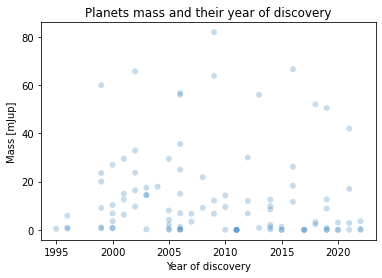

In [10]:
plt.scatter(tabela_RV['discovered'], tabela_RV['mass'], alpha = 0.25, edgecolors = 'none')
plt.xlabel("Year of discovery")
plt.ylabel("Mass [mJup]")
plt.title("Planets' mass and their year of discovery")

There appears to be no significant correlation between the year of discovery and mass of the planet when considering only the planets detected using the method of radial velocities, although number of less massive planets discovered is greater than the number of more massive planets (for every year of our set).   

In [ ]:
3)Plot now the radius of planets detected by the transit method.
Compare the result to the radial velocity exoplanets (use the same axis range
for best comparison). What is the trend for transiting planets before 2009 and
what is the trend after 2009? Why is there a change in the trend? 

In [11]:
query_radius_RV = "SELECT radius, discovered, detection_type FROM exoplanet.epn_core WHERE radius is not NULL and discovered is not NULL and detection_type = 'Radial Velocity'"
query_radius_transit = "SELECT radius, discovered, detection_type FROM exoplanet.epn_core WHERE radius is not NULL and discovered is not NULL and detection_type = 'Primary Transit'"
tabela_radius_RV = service.search(query_radius_RV)
tabela_radius_RV = tabela_radius_RV.to_table()
tabela_radius_transit = service.search(query_radius_transit)
tabela_radius_transit = tabela_radius_transit.to_table()


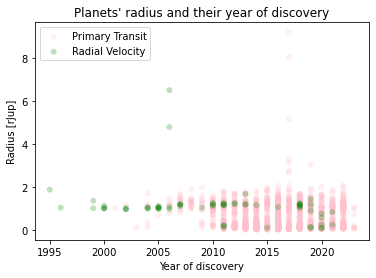

In [24]:
plt.scatter(tabela_radius_transit['discovered'], tabela_radius_transit['radius'], alpha = 0.25, edgecolors = 'none', color = 'pink')
plt.scatter(tabela_radius_RV['discovered'], tabela_radius_RV['radius'], alpha = 0.25, edgecolors = 'none', color = 'green')
plt.xlabel("Year of discovery")
plt.ylabel("Radius [rJup]")
plt.title("Planets' radius and their year of discovery")
plt.legend([ 'Primary Transit','Radial Velocity'])

From the plots, we can notice an increasing amount of planets detected using method of primary transit over time. The jump in numbers coincides with the start of the "Kepler" mission. The range of possible radii is more populated when using the primary transit method than when using RV method, although further analysis is needed to show if this is a feature of the methods itself or if it is a consequence of a large difference in the number of planets detected with each method in our dataset. 

4)Plot the eccentricity of the planet orbit versus the orbital period
of the planet. How is the eccentricity of exoplanet orbits compared to the
planets in the Solar System? What happens to the eccentricity for planets in
very short periods? Some planets have very long periods. How are those
detected? 

In [29]:
query_ecc_per = "SELECT eccentricity, period FROM exoplanet.epn_core WHERE eccentricity is not NULL and period is not NULL"
tabela_ecc_per = service.search(query_ecc_per)
tabela_ecc_per = tabela_ecc_per.to_table()

In [30]:
tabela_ecc_per

eccentricity,period
,d
float64,float64
0.231,326.03
0.08,516.22
0.0,185.84
0.369,1763.3
0.64,52596.0
0.689,799.5
...,...
0.23,49.41


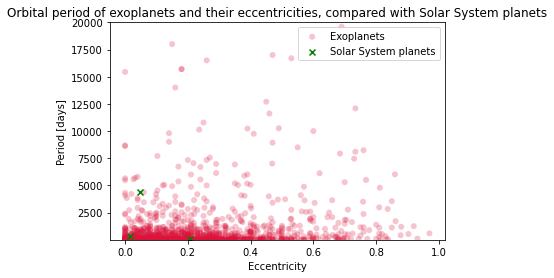

In [69]:
plt.scatter(tabela_ecc_per['eccentricity'], tabela_ecc_per['period'], alpha = 0.25, edgecolors = 'none', color = 'crimson')
plt.ylim(top = 20000)
plt.ylim(bottom = 10e-2)
#plt.yscale('log')
solar_sys_ecc = [0.2056, 0.0167, 0.0484, 0.0086] #merkur zemlja jupiter neptrun
solar_sys_period = [88, 365, 12*365, 165*365]
plt.scatter(solar_sys_ecc, solar_sys_period, alpha = 1, marker = 'x', color = 'green')
plt.xlabel('Eccentricity')
plt.ylabel('Period [days]')
plt.title("Orbital period of exoplanets and their eccentricities, compared with Solar System planets")
plt.legend(["Exoplanets", "Solar System planets"])

There seems to be a weak correlation between eccentricity and period, with a bigger number of low eccentricity planets having short periods. Eccentricity of exoplanets covers a much wider range than eccentricities of Solar System planets.

5)Plot now the eccentricity of the planet orbit versus planet mass.
What trends do you see? Next limit the exoplanets to those for which a transit
has been detected. Comment on the difference. Place the Solar System
planets on the plots and comment. 

In [59]:
query_ecc_mass_transit = "SELECT eccentricity, mass, detection_type FROM exoplanet.epn_core WHERE detection_type = 'Primary Transit' and eccentricity is not NULL and mass is not NULL"
tabela_ecc_mass_transit = service.search(query_ecc_mass_transit)
tabela_ecc_mass_transit = tabela_ecc_mass_transit.to_table()



In [61]:
query_ecc_mass_other = "SELECT eccentricity, mass, detection_type FROM exoplanet.epn_core WHERE detection_type != 'Primary Transit' and eccentricity is not NULL and mass is not NULL"
tabela_ecc_mass_other = service.search(query_ecc_mass_other)
tabela_ecc_mass_other = tabela_ecc_mass_other.to_table()

Text(0.5, 1.0, 'Mass of exoplanets and their eccentricities, compared with Solar System planets')

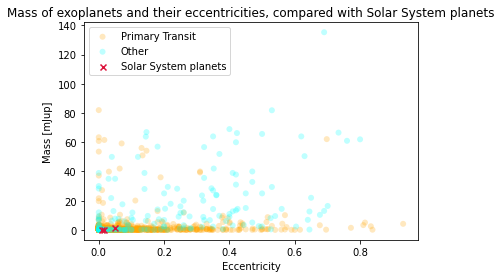

In [70]:
plt.scatter(tabela_ecc_mass_transit['eccentricity'], tabela_ecc_mass_transit['mass'], alpha = 0.25, edgecolors='none', color = 'orange')
plt.scatter(tabela_ecc_mass_other['eccentricity'], tabela_ecc_mass_other['mass'], alpha = 0.25, edgecolors='none', color = 'cyan')
solar_sys_ecc = [0.0167, 0.0484, 0.0086] #zemlja jupiter neptrun
solar_sys_mass = [0.003, 1, 0.05]

plt.scatter(solar_sys_ecc, solar_sys_mass, alpha = 1, color = 'crimson', marker = 'x')
plt.legend(['Primary Transit', 'Other', 'Solar System planets'])
plt.xlabel('Eccentricity')
plt.ylabel('Mass [mJup]')
plt.title('Mass of exoplanets and their eccentricities, compared with Solar System planets')

We can notice that most heavier planets are detected by methods other than the primary transit method. Again, most planets are found in the low eccentricity part of the plot, but this time we can notice that the masses tend to be below 20 mJup. 